In [85]:
import csv
import json
import os
run_name = "train"
data_path = os.path.join('runs', 'detect', run_name, 'bias.jsonl')

with open(data_path, 'r') as f:
    # headers = next(reader)
    # hd = {name: i for i, name in enumerate(headers)}
    data = []
    for row in f:
        data.append(json.loads(row))

# print(headers)
print(len(data))

12


In [86]:
data[0]

{'acc': 0.2716049382716049,
 'labels_dist': {'plane': 61, 'None': 12, 'bird': 8},
 'predictions_dist': {'plane': {'guess_rate': 0.30864197530864196,
   'True_Pos': 18,
   'False_Pos': 7,
   'True_Neg': 13,
   'False_Neg': 43},
  'bird': {'guess_rate': 0.691358024691358,
   'True_Pos': 4,
   'False_Pos': 52,
   'True_Neg': 21,
   'False_Neg': 4}},
 'epoch': 0,
 'batch': 0}

In [87]:
TOTAL_BATCHES = 113

data.sort(key=lambda row: row['epoch'] + (row['batch']/TOTAL_BATCHES))

normed_batches = [row['epoch'] + (row['batch']/TOTAL_BATCHES) for row in data]
print(normed_batches)


def get_col(col_name):
    return (
        [row['predictions_dist'][col_name]['guess_rate'] for row in data]
        if col_name not in data[0] else
        [row[col_name] for row in data]
    )

guesses = ['False_Pos', 'True_Pos', 'False_Neg', 'True_Neg']

total_bird = [sum([row['predictions_dist']['bird'][x] for x in guesses]) for row in data]
total_plane = [sum([row['predictions_dist']['plane'][x] for x in guesses]) for row in data]
gr_bird = [row['predictions_dist']['bird']['guess_rate'] for row in data]
gr_plane = [row['predictions_dist']['plane']['guess_rate'] for row in data]
fp_plane = [row['predictions_dist']['plane']['False_Pos'] / total for row, total in zip(data, total_plane)]
fp_bird = [row['predictions_dist']['bird']['False_Pos'] / total for row, total in zip(data, total_bird)]


[0.0, 0.061946902654867256, 1.0, 1.0619469026548674, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [88]:
import matplotlib.pyplot as plt

def plot_multiple_lines(x, y_lists, labels=None, title='Line Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    Plots multiple lines on a graph.

    Parameters:
    - x: List of x-axis values.
    - y_lists: List of lists containing y-axis values for each line.
    - labels: List of labels for each line (default is None).
    - title: Title of the graph (default is 'Line Graph').
    - xlabel: Label for the x-axis (default is 'X-axis').
    - ylabel: Label for the y-axis (default is 'Y-axis').
    """
    for i, y in enumerate(y_lists):
        label = labels[i] if labels else None
        plt.plot(
            x,
            y,
            # marker='o',
            label=label
        )
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Adding legend if labels are provided
    if labels:
        plt.legend()
    
    # Display the graph
    plt.show()

In [90]:
print([(row['epoch'], row['batch']) for row in data])

[(0, 0), (0, 7), (1, 0), (1, 7), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]


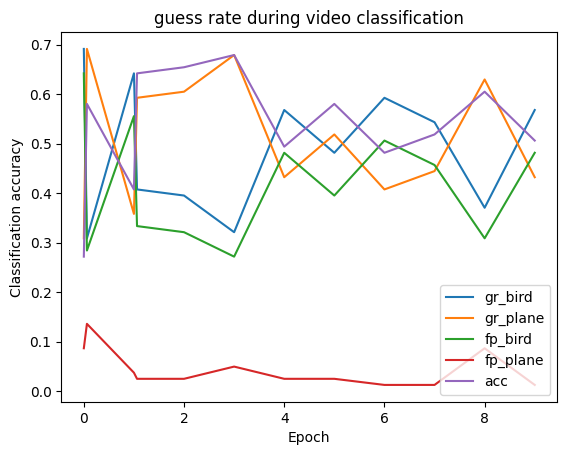

In [89]:
plot_multiple_lines(
    normed_batches,
    [
        gr_bird,
        gr_plane,
        fp_bird,
        fp_plane,
        get_col('acc')
    ],
    [
        'gr_bird',
        'gr_plane',
        'fp_bird',
        'fp_plane',
        'acc'
    ],
    title='guess rate during video classification',
    xlabel="Epoch",
    ylabel="Classification accuracy"
    )

In [1]:
"st"

'st'